## Linear Regression(선형회귀)

- 선형회귀 또는 최소 제곱법은 가장 간단하고 가장 전통적인 선형회귀 알고리즘!
- y = wx+b에서 x(특성), y(예측값) 다수 주어진 경우 w와 b를 구하는 알고리즘.
- w : 기울기(가중치)
- b : 절편, 편향(bias)
- 평균제곱오차 : 예측값과 타겟값 차이를 제곱하여 더한 후 샘플 갯수로 나눔
- 경사하강법 : 오차가 최소화되는 w와 b값을 찾기위해 사용
- 매개변수(하이퍼파라미터)가 없음 >> 모델의 복잡도를 제어할 수 없음!
- 라쏘, 릿지를 사용하여 모델 복잡도를 조정!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame( [[2, 20], [4, 40], [8,80], [9,90]],
                   index = ['김','나','박','이'],
                   columns = ['time','score'])

In [3]:
data

,time,score
김,2,20
나,4,40
박,8,80
이,9,90


### 1. 수학공식 이용 해석적 모델
- LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()

In [6]:
model.fit(data[['time']],data['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print(model.coef_) #가중치 조회

[10.]


In [8]:
print(model.intercept_) #절편

7.105427357601002e-15


In [9]:
model.predict([[7]])

array([70.])

### 2. 경사하강법 사용

- SGDRegressor 사용!

In [10]:
from sklearn.linear_model import SGDRegressor

In [11]:
model = SGDRegressor(max_iter = 5000, 
                    eta0= 0.01,
                     verbose = 1
                    ) 
#max_iter : 가중치 업데이트 반복횟수(epoch)
#eta0 : 학습률(learning rate)
#verbose : 학습과정 확인

In [12]:
model.fit(data[['time']],data['score'])

-- Epoch 1
Norm: 8.10, NNZs: 1, Bias: 1.289334, T: 4, Avg. loss: 954.618070
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.35, NNZs: 1, Bias: 1.472217, T: 8, Avg. loss: 33.701718
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.66, NNZs: 1, Bias: 1.511632, T: 12, Avg. loss: 2.653335
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.76, NNZs: 1, Bias: 1.518961, T: 16, Avg. loss: 0.464734
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.79, NNZs: 1, Bias: 1.517503, T: 20, Avg. loss: 0.262832
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.80, NNZs: 1, Bias: 1.513423, T: 24, Avg. loss: 0.242661
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.80, NNZs: 1, Bias: 1.508579, T: 28, Avg. loss: 0.240163
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.80, NNZs: 1, Bias: 1.503575, T: 32, Avg. loss: 0.238787
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.81, NNZs: 1, Bias: 1.498611, T: 36, Avg. loss: 0.237181
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [13]:
model.predict([[7]])

array([70.09759135])

In [14]:
print(model.coef_) #w값
print(model.intercept_) #b값

[9.81696958]
[1.3788043]


In [15]:
model = SGDRegressor(max_iter = 8000, 
                    eta0= 0.01,
                     verbose = 1
                    ) 

In [16]:
model.fit(data[['time']],data['score'])

-- Epoch 1
Norm: 8.57, NNZs: 1, Bias: 1.201328, T: 4, Avg. loss: 960.491259
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.51, NNZs: 1, Bias: 1.312477, T: 8, Avg. loss: 19.642379
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.73, NNZs: 1, Bias: 1.338419, T: 12, Avg. loss: 1.326610
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.79, NNZs: 1, Bias: 1.340586, T: 16, Avg. loss: 0.307068
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.80, NNZs: 1, Bias: 1.337179, T: 20, Avg. loss: 0.210517
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.82, NNZs: 1, Bias: 1.334573, T: 24, Avg. loss: 0.192271
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.82, NNZs: 1, Bias: 1.329761, T: 28, Avg. loss: 0.188824
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.81, NNZs: 1, Bias: 1.324706, T: 32, Avg. loss: 0.185229
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.321429, T: 36, Avg. loss: 0.183939
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=8000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [17]:
print(model.predict([[7]]))
print(model.coef_) #w값
print(model.intercept_) #b값

[70.04042996]
[9.84394196]
[1.13283624]


## 보스턴 주택값 예측

In [18]:
from sklearn.datasets import load_boston

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [20]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [22]:
X = pd.DataFrame(boston.data , columns= boston.feature_names) #문제 데이터
y = pd.DataFrame(boston.target, columns= ['price']) # 정답 데이터

In [23]:
data = pd.concat([X,y], axis = 1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
import seaborn as sns

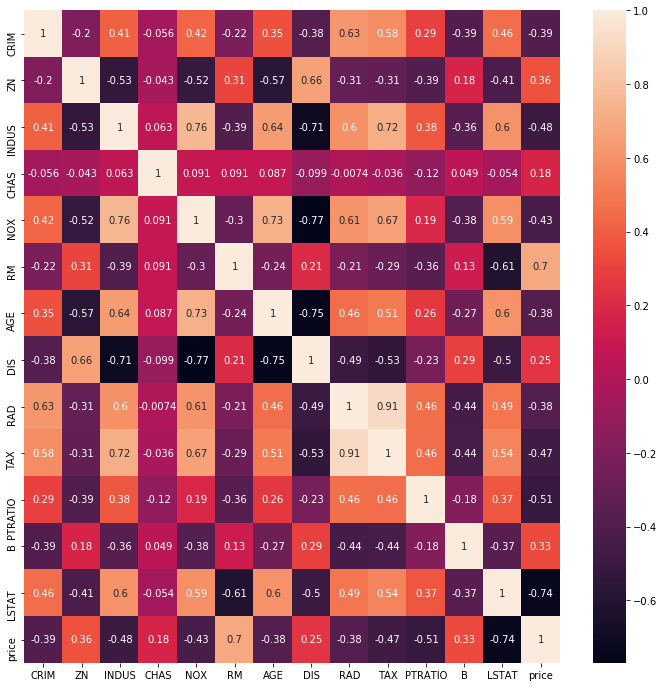

In [25]:
# 상관관계 분석
plt.figure(figsize = (12,12))
sns.heatmap( data.corr(), annot = True)
plt.show()

In [26]:
data.shape

(506, 14)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 모델 평가

In [30]:
from sklearn.metrics import mean_squared_error #평균제곱오차

In [31]:
pre_train = model.predict(X_train)
pre_test = model.predict(X_test)

In [32]:
#오차값이 적을수록 좋은 모델
print("훈련 세트 MSE : " , mean_squared_error(pre_train, y_train))
print("테스트 세트 MSE : " , mean_squared_error(pre_test, y_test))

훈련 세트 MSE :  19.640519427908043
테스트 세트 MSE :  29.78224509230237


### 특성 확장

In [33]:
#컬럼끼리 값을 곱하여 새로운 컬럼 추가

col = X.columns

for i in range(col.size) :
    for j in range( i, col.size) :
        X[col[i]+'x'+col[j]] = X[col[i]] * X[col[j]]

In [34]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [35]:
X.shape

(506, 104)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [37]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
pre_train = model.predict(X_train)
pre_test = model.predict(X_test)

print("훈련 세트 MSE : " , mean_squared_error(pre_train, y_train))
print("테스트 세트 MSE : " , mean_squared_error(pre_test, y_test))
## 훈련, 테스트 세트 격차가 벌어졌다 -- > 과대적합 심해짐!!!

훈련 세트 MSE :  4.090362612543782
테스트 세트 MSE :  32.069135121012884


### 과대적합 완화하기 : 규제(Ridge, Lasso)

In [39]:
from sklearn.linear_model import Ridge, Lasso

In [40]:
rid = Ridge(alpha = 10).fit(X_train, y_train)

In [41]:
pre_train = rid.predict(X_train)
pre_test = rid.predict(X_test)

print("훈련 세트 MSE : " , mean_squared_error(pre_train, y_train))
print("테스트 세트 MSE : " , mean_squared_error(pre_test, y_test))

훈련 세트 MSE :  4.982513479011909
테스트 세트 MSE :  23.204339526795682


In [42]:
las = Lasso(alpha = 0.1).fit(X_train, y_train)

print('사용한 특성 수 : ', np.sum(las.coef_ != 0))

사용한 특성 수 :  77


C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1390.2307980463295, tolerance: 3.233182126649077
  positive)


In [43]:
pre_train = las.predict(X_train)
pre_test = las.predict(X_test)

print("훈련 세트 MSE : " , mean_squared_error(pre_train, y_train))
print("테스트 세트 MSE : " , mean_squared_error(pre_test, y_test))

훈련 세트 MSE :  6.519975300316968
테스트 세트 MSE :  20.596121914519603


### R2 SCORE 구하기

In [44]:
print("훈련 세트 R2 스코어 : ",  las.score(X_train, y_train))
print("테스트 세트 R2 스코어 : ", las.score(X_test, y_test))

훈련 세트 R2 스코어 :  0.923571560709412
테스트 세트 R2 스코어 :  0.7479024465093846


### 최적 규제값(alpha) 찾기

In [45]:
train_error = []
test_error = [] 

# 1.라쏘 모델 알파값 설정 후 훈련 
# 2. 훈련 데이터셋 평가
# 3. 훈련 결과 이용하여 평균제곱 오차를 구한 후 리스트에 추가
alpha_list = ['0.0001', '0.001', '0.01', '0.1', '1.0', '10', '100', '1000']


for i in alpha_list :
    lasso = Lasso(alpha = float(i)).fit(X_train, y_train)
    pred = lasso.predict(X_train)
    train_error.append(mean_squared_error(pred, y_train))
    pred = lasso.predict(X_test)
    test_error.append(mean_squared_error(pred, y_test))

C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018.8524830175409, tolerance: 3.233182126649077
  positive)
C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1044.1440984658825, tolerance: 3.233182126649077
  positive)
C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131.6918383506793, tolerance: 3.233182126649077
  positive)
C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

In [46]:
for i in alpha_list :
    lasso = Lasso(alpha = float(i)).fit(X_train, y_train)
    pred = lasso.predict(X_train)
    print('alpha 값 ', i , ' 에 따른 훈련 MSE :', mean_squared_error(pred, y_train))
    pred = lasso.predict(X_test)
    print('alpha 값 ', i , ' 에 따른 테스트 MSE :',mean_squared_error(pred, y_test))

C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018.8524830175409, tolerance: 3.233182126649077
  positive)


alpha 값  0.0001  에 따른 훈련 MSE : 5.354266565135739
alpha 값  0.0001  에 따른 테스트 MSE : 32.85820688739963


C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1044.1440984658825, tolerance: 3.233182126649077
  positive)
C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131.6918383506793, tolerance: 3.233182126649077
  positive)


alpha 값  0.001  에 따른 훈련 MSE : 5.376837325236749
alpha 값  0.001  에 따른 테스트 MSE : 31.057795823448153
alpha 값  0.01  에 따른 훈련 MSE : 5.53134136121975
alpha 값  0.01  에 따른 테스트 MSE : 26.8691780952422
alpha 값  0.1  에 따른 훈련 MSE : 6.519975300316968
alpha 값  0.1  에 따른 테스트 MSE : 20.596121914519603
alpha 값  1.0  에 따른 훈련 MSE : 7.944889593234804
alpha 값  1.0  에 따른 테스트 MSE : 22.21954375207269
alpha 값  10  에 따른 훈련 MSE : 9.905795924606986
alpha 값  10  에 따른 테스트 MSE : 23.146155764026
alpha 값  100  에 따른 훈련 MSE : 16.023088174109112
alpha 값  100  에 따른 테스트 MSE : 28.820165524751733
alpha 값  1000  에 따른 훈련 MSE : 29.13633427364606
alpha 값  1000  에 따른 테스트 MSE : 43.67233344155606


C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1390.2307980463295, tolerance: 3.233182126649077
  positive)
C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748.7609555118702, tolerance: 3.233182126649077
  positive)
C:\Users\SMT002\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2227.2543010480877, tolerance: 3.233182126649077
  positive)


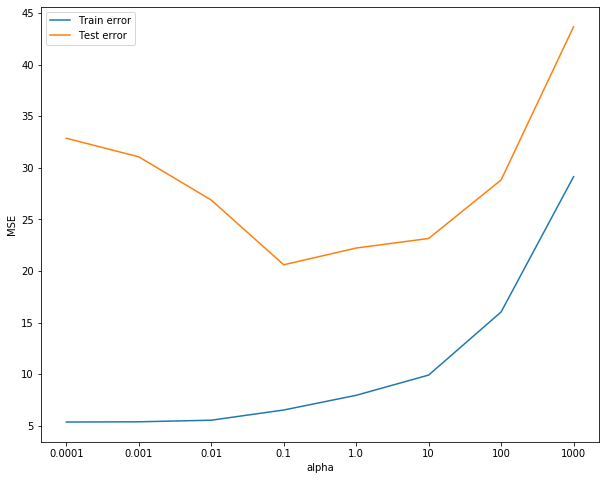

In [47]:
plt.figure( figsize = (10,8))
plt.plot(alpha_list, train_error, label = 'Train error')
plt.plot(alpha_list, test_error, label = 'Test error')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

### 데이터 스케일링

1.	StandardScaler	기본 스케일. 평균과 표준편차 사용 .. 평균을 제거하고 데이터를 단위 분산으로 조정한다.
2.	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
3.	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
4.	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [49]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [50]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [52]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 3).fit(X_train, y_train)
print("-----Scaler 적용 전-----")
print("훈련 세트 점수 :" ,model.score(X_train, y_train))
print("테스트 세트 점수 :",model.score(X_test, y_test))

-----Scaler 적용 전-----
훈련 세트 점수 : 0.9460093896713615
테스트 세트 점수 : 0.9230769230769231


In [53]:
standard = StandardScaler().fit(X_train, y_train)
X_train_scaler = standard.transform(X_train)
X_test_scaler = standard.transform(X_test)

model = KNeighborsClassifier(n_neighbors= 3).fit(X_train_scaler, y_train)
print("-----StandardScaler 적용-----")
print("훈련 세트 점수 :" ,model.score(X_train_scaler, y_train))
print("테스트 세트 점수 :",model.score(X_test_scaler, y_test))

-----StandardScaler 적용-----
훈련 세트 점수 : 0.9835680751173709
테스트 세트 점수 : 0.958041958041958


In [54]:
standard = MinMaxScaler().fit(X_train, y_train)
X_train_scaler = standard.transform(X_train)
X_test_scaler = standard.transform(X_test)

model = KNeighborsClassifier(n_neighbors= 3).fit(X_train_scaler, y_train)
print("-----MinMaxScaler 적용-----")
print("훈련 세트 점수 :" ,model.score(X_train_scaler, y_train))
print("테스트 세트 점수 :",model.score(X_test_scaler, y_test))

-----MinMaxScaler 적용-----
훈련 세트 점수 : 0.9835680751173709
테스트 세트 점수 : 0.9370629370629371


In [55]:
standard = RobustScaler().fit(X_train, y_train)
X_train_scaler = standard.transform(X_train)
X_test_scaler = standard.transform(X_test)

model = KNeighborsClassifier(n_neighbors= 3).fit(X_train_scaler, y_train)
print("-----RobustScaler 적용-----")
print("훈련 세트 점수 :" ,model.score(X_train_scaler, y_train))
print("테스트 세트 점수 :",model.score(X_test_scaler, y_test))

-----RobustScaler 적용-----
훈련 세트 점수 : 0.9812206572769953
테스트 세트 점수 : 0.951048951048951
